# [Merging Data with `pandas`](https://www.datacamp.com/completed/statement-of-accomplishment/course/dd47f95b758105f23e5408e97074ea2b91529278)

[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/adamelliotfields/datacamp/blob/main/notebooks/courses/merging_data_with_pandas/notebook.ipynb)

In [1]:
%matplotlib inline


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [3]:
pd.set_option("display.max_columns", None)
pd.set_option("display.width", np.iinfo(np.int32).max)

# chicago data
biz_owners = pd.read_pickle("chicago_biz_owners.pkl")
census = pd.read_pickle("chicago_census.pkl")
cal = pd.read_pickle("chicago_cta_cal.pkl")
ridership = pd.read_pickle("chicago_cta_ridership.pkl")
stations = pd.read_pickle("chicago_cta_stations.pkl")
land_use = pd.read_pickle("chicago_land_use.pkl")
licenses = pd.read_pickle("chicago_licenses.pkl")
taxi_owners = pd.read_pickle("chicago_taxi_owners.pkl")
taxi_vehicles = pd.read_pickle("chicago_taxi_vehicles.pkl")
wards = pd.read_pickle("chicago_wards.pkl")
zip_demo = pd.read_pickle("chicago_zip_demo.pkl")

# tmdb data
actors_movies = pd.read_pickle("tmdb_actors_movies.pkl")
casts = pd.read_pickle("tmdb_casts.pkl")
crews = pd.read_pickle("tmdb_crews.pkl")
financials = pd.read_pickle("tmdb_financials.pkl")
movie_to_genres = pd.read_pickle("tmdb_movie_to_genres.pkl")
movies = pd.read_pickle("tmdb_movies.pkl")
ratings = pd.read_pickle("tmdb_ratings.pkl")
sequels = pd.read_pickle("tmdb_sequels.pkl")
taglines = pd.read_pickle("tmdb_taglines.pkl")

# chapter 3
employees = pd.read_csv("sales_employees.csv", parse_dates=["hire_date"])
top_cust = pd.read_csv("sales_top_customers.csv")
inv_jul = pd.read_csv("sales_invoices_july.csv")
inv_aug = pd.read_csv("sales_invoices_august.csv")
inv_sep = pd.read_csv("sales_invoices_september.csv")
non_mus_tcks = pd.read_csv("music_non_music_tracks.csv")
top_invoices = pd.read_csv("music_top_invoices.csv")
genres = pd.read_csv("music_genres.csv")
tracks_master = pd.read_csv("music_tracks_master.csv")
tracks_ride = pd.read_csv("music_tracks_ride.csv")
tracks_st = pd.read_csv("music_tracks_st.csv")
artists = pd.read_csv("music_artists.csv")
albums = pd.read_csv("music_albums.csv")
classic_18 = pd.read_csv("music_classic_18.csv")
classic_19 = pd.read_csv("music_classic_19.csv")
pop_18 = pd.read_csv("music_pop_18.csv")
pop_19 = pd.read_csv("music_pop_19.csv")

# world bank
gdp = pd.read_csv("world_bank_gdp.csv")
pop = pd.read_csv("world_bank_pop.csv")
gdp_series = pd.read_csv("world_bank_gdp_series.csv", parse_dates=["date"])
pop_series = pd.read_csv("world_bank_pop_series.csv", parse_dates=["date"])

# usa
dji = pd.read_csv("usa_dji.csv")
sp500 = pd.read_csv("usa_sp500.csv")
inflation = pd.read_csv("usa_inflation.csv")
unemployment = pd.read_csv("usa_unemployment.csv")
recession = pd.read_csv("usa_recession.csv", parse_dates=["date"])
usa_gdp = pd.read_csv("usa_gdp.csv", parse_dates=["date"])
ten_yr = pd.read_csv("usa_10_year.csv")
ur_wide = pd.read_csv(
    "usa_unemployment_rate.csv", dtype={"year": str}
)  # ensure year is string not an int (for concatenation)

# stocks
jpm = pd.read_csv("stocks_jpm.csv", parse_dates=["date_time"])
wells = pd.read_csv("stocks_wfc.csv", parse_dates=["date_time"])
bac = pd.read_csv("stocks_bac.csv", parse_dates=["date_time"])

# convert to int64
# can also use `to_numeric` with `downcast` set to "integer"
licenses["ward"] = licenses["ward"].astype("int64")
land_use["ward"] = land_use["ward"].astype("int64")


### Merging Basics

In Pandas, `merge` is the main method for combining DataFrames. In SQL, the `JOIN` keyword is used to combine records from two tables.

In [4]:
# merge on the `vid` column
taxi_own_veh = taxi_owners.merge(taxi_vehicles, on="vid", suffixes=("_own", "_veh"))
fuel_type_counts = taxi_own_veh["fuel_type"].value_counts()

# merge on the `ward` column and add suffixes
wards_census = wards.merge(census, on="ward", suffixes=("_ward", "_census"))

# merge on the `account` column, group by title and count, then sort descending
licenses_owners = licenses.merge(biz_owners, on="account")
counted_df = licenses_owners.groupby("title").agg({"account": "count"})
sorted_df = counted_df.sort_values("account", ascending=False)

# merge on the `year`, `month`, and `day` columns; then merge on `station_id`
ridership_cal = ridership.merge(cal, on=["year", "month", "day"])

# merge another dataframe
ridership_cal_stations = ridership_cal.merge(stations, on="station_id")

# find the total rides at the Wilson station on weekdays in July
filter_criteria = (
    (ridership_cal_stations["month"] == 7)
    & (ridership_cal_stations["day_type"] == "Weekday")
    & (ridership_cal_stations["station_name"] == "Wilson")
)
result = ridership_cal_stations.loc[filter_criteria, "rides"].sum()

# merge on `zip`; then merge on `ward`; then groupby `alderman` and find the median income
licenses_zip_ward = licenses.merge(zip_demo, on="zip").merge(wards, on="ward")
median_income_by_ward = licenses_zip_ward.groupby("alderman").agg({"income": "median"})

# merge on `ward`; then merge with suffixes
land_cen_lic = land_use.merge(census, on="ward").merge(
    licenses,
    on="ward",
    suffixes=("_cen", "_lic"),
)

# group by `ward`, `pop_2010`, and `vacant`; then count accounts
pop_vac_lic = land_cen_lic.groupby(["ward", "pop_2010", "vacant"], as_index=False).agg(
    {"account": "count"}
)

# sort by `vacant`, `account`, and `pop_2010` in descending/ascending/ascending order respectively
sorted_pop_vac_lic = pop_vac_lic.sort_values(
    ["vacant", "account", "pop_2010"],
    ascending=[False, True, True],
)


### Join Types

  * _Inner_: only include observations found in both DataFrames
  * _Left_: include all observations found in the left DataFrame
  * _Right_: include all observations found in the right DataFrame

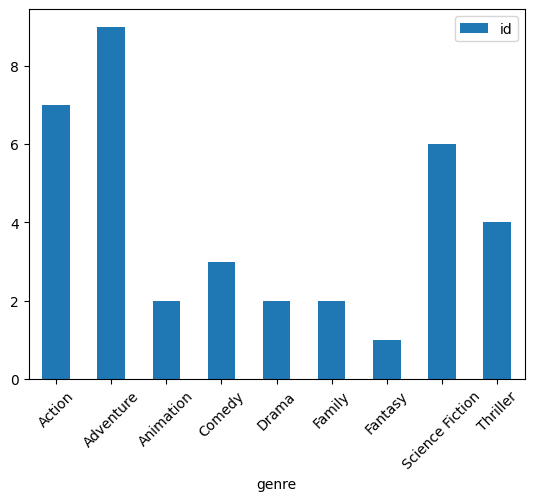

In [5]:
# merge movies and financials using a left join
movies_financials = movies.merge(financials, on="id", how="left")

# count missing rows in `budget` column
number_of_missing_fin = movies_financials["budget"].isna().sum()

# get all "Toy Story" movies
toy_story = movies[movies["title"].str.contains("Toy Story")]
toy_story.reset_index(drop=True, inplace=True)

# merge toy_story and taglines with a left join
toystory_tag = toy_story.merge(taglines, on="id", how="left")

# merge movies.id with movies_to_genres.movie_id sorted ascending by `id`
movies_genres = movies.merge(
    movie_to_genres,
    left_on="id",
    right_on="movie_id",
    how="left",
    sort=True,
)
action_movies = movies_genres[movies_genres["genre"] == "Action"]
scifi_movies = movies_genres[movies_genres["genre"] == "Science Fiction"]

# get the 10 most popular movies
pop_movies = movies.sort_values("popularity", ascending=False).head(10)

# merge with a right join
action_scifi = action_movies.merge(
    scifi_movies,
    on="movie_id",
    how="right",
    suffixes=("_act", "_sci"),
)

# merge with an inner join
scifi_only = action_scifi[action_scifi["genre_act"].isna()]
movies_and_scifi_only = movies.merge(
    scifi_only,
    left_on="id",
    right_on="movie_id",
)

# merge movie_to_genres and pop_movies using a right join
genres_movies = movie_to_genres.merge(
    pop_movies,
    left_on="movie_id",
    right_on="id",
    how="right",
)

# count the genres and plot
genre_count = genres_movies.groupby("genre").agg({"id": "count"})
genre_count.plot(kind="bar", rot=45)
plt.show()


### Outer Joins

Include all observations found in both DataFrames; missing values are filled with `NaN`.

In [6]:
# select id, character, name from casts where movie_id = 1726;
iron_1_actors = casts[casts["movie_id"] == 1726][["id", "character", "name"]]
iron_2_actors = casts[casts["movie_id"] == 10138][["id", "character", "name"]]

# merge with outer join using suffixes
iron_1_and_2 = iron_1_actors.merge(
    iron_2_actors,
    on="id",
    how="outer",
    suffixes=("_1", "_2"),
)

# create a filter that returns `True` if either `name_1` or `name_2` are null
actor_filter = (iron_1_and_2["name_1"].isna()) | (iron_1_and_2["name_2"].isna())
not_iron_1_and_2_actors = iron_1_and_2[actor_filter]


### Self Joins

A DataFrame merged with itself.

In [7]:
# merge the crews table to itself
crews_self_merged = crews.merge(
    crews,
    on="id",
    suffixes=("_dir", "_crew"),
)
director_filter = (crews_self_merged["job_dir"] == "Director") & (
    crews_self_merged["job_crew"] != "Director"
)
direct_crews = crews_self_merged[director_filter]

# merge sequels_fin to itself using an index merge
movies_ratings = movies.merge(
    ratings,
    on="id",
    how="left",
)
sequels_fin = sequels.merge(
    financials,
    on="id",
    how="left",
)
orig_seq = sequels_fin.merge(
    sequels_fin,
    how="inner",
    left_on="sequel",
    right_on="id",
    right_index=True,
    suffixes=("_org", "_seq"),
)

# subtract revenue_org from revenue_seq
orig_seq["diff"] = orig_seq["revenue_seq"] - orig_seq["revenue_org"]

# select the title_org, title_seq, and diff
titles_diff = orig_seq[["title_org", "title_seq", "diff"]]

# sort by `diff`
titles_diff_sorted = titles_diff.sort_values("diff", ascending=False)


### Filtering Joins

So far these have all been examples of _mutating joins_, meaning that the rows of the merged DataFrame are a combination of the rows from the two original DataFrames. Another type of join is a _filtering join_, where the resulting DataFrame is a subset of the rows in the original DataFrame(s).

Filtering joins can be _semi joins_ or _anti joins_. The former keeps only the rows from the left DataFrame where the key values are found in the right DataFrame. The latter keeps only the rows from the left DataFrame where the key values are _not_ found in the right DataFrame.

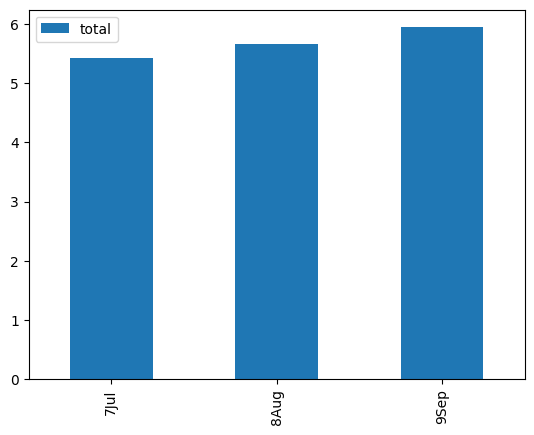

In [8]:
# merge on `srid` using left
# the `indicator` parameter adds a `_merge` column to the result
empl_cust = employees.merge(
    top_cust,
    on="srid",
    how="left",
    indicator=True,
)

# select the `srid` column where `_merge` is "left_only"
# this will be employees that don't appear in the "top customers" table
srid_list = empl_cust.loc[empl_cust["_merge"] == "left_only", "srid"]

# get employees not working with top customers
empl_filtered = employees[employees["srid"].isin(srid_list)]

# merge on `tid` using inner
tracks_invoices = non_mus_tcks.merge(
    top_invoices,
    on="tid",
)

# subset non_mus_tcks to rows with `tid` in tracks_invoices using `.isin()`
top_tracks = non_mus_tcks[non_mus_tcks["tid"].isin(tracks_invoices["tid"])]

# group the top tracks by `gid` and count the `tid` rows
cnt_by_gid = top_tracks.groupby("gid", as_index=False).agg({"tid": "count"})

# find top revenue generating genres with non-musical tracks by merging on `gid`
top_genres = cnt_by_gid.merge(
    genres,
    on="gid",
)

# concatenate the tracks
tracks_from_albums = pd.concat([tracks_master, tracks_ride, tracks_st], sort=True)

# concatenate the tracks so the index goes from 0 to n-1
tracks_from_albums_ignore_index = pd.concat(
    [tracks_master, tracks_ride, tracks_st], ignore_index=True, sort=True
)

# concatenate the tracks showing only columns that are in both
tracks_from_albums_inner = pd.concat(
    [tracks_master, tracks_ride, tracks_st], join="inner", sort=True
)

# validate the merge
# artists.merge(albums, on="artid", validate="many_to_one")

# concatenate the classic and pop tables vertically and merge; then find the popular classical songs
classic_18_19 = pd.concat([classic_18, classic_19], ignore_index=True)
pop_18_19 = pd.concat([pop_18, pop_19], ignore_index=True)
classic_pop = classic_18_19.merge(pop_18_19, on="tid")
popular_classic = classic_18_19[classic_18_19["tid"].isin(classic_pop["tid"])]

# concatenate the invoice tables vertically and add keys
inv_jul_thr_sep = pd.concat([inv_jul, inv_aug, inv_sep], keys=["7Jul", "8Aug", "9Sep"])

# group the invoices by the index keys and find the average total
avg_inv_by_month = inv_jul_thr_sep.groupby(level=0).agg({"total": "mean"})

# plot the average monthly invoice total
avg_inv_by_month.plot(kind="bar")
plt.show()


### Merging Ordered and Time Series Data

_Ordered data_ is data that has a meaningful order; _time series data_ is ordered data where the ordering is by time. Pandas provides special functionality for merging ordered data.

The `merge_ordered()` method has an optional `fill_method` arg that allows us to specify how we want to fill in missing values in ordered data. _Forward-filling_ propagates the last observed value forward until a new value is encountered. _Backward-filling_ propagates the next observed value backward until a new value is encountered.

There's also the `merge_asof()` method, which performs an _asof merge_. This is commonly used when merging on timestamps, as the times in two tables are rarely going to match exactly. For example, if you have the date `01-02-2020` in one table, it could match a row with the date `01-01-2020` or `01-03-2020` depending on the direction of the merge (forward or backward).

In [9]:
gdp_usa = gdp[gdp["country code"] == "USA"]

# merge_ordered on year and date
# interpolate missing values by forward-filling
gdp_sp500 = pd.merge_ordered(
    gdp_usa,
    sp500,
    left_on="year",
    right_on="date",
    how="left",
    fill_method="ffill",
)

# subset `gdp` and `returns` columns
gdp_returns = gdp_sp500[["gdp", "returns"]]

# get the correlation
correlation = gdp_returns.corr()

# merge_ordered on `date`
inflation_unemploy = pd.merge_ordered(
    inflation,
    unemployment,
    on="date",
)

# merge_ordered on `year` and `country code` with ffill
ctry_date = pd.merge_ordered(
    gdp,
    pop,
    on=["year", "country code"],
    fill_method="ffill",
)

# merge_ordered on `country code` and `year` with ffill
date_ctry = pd.merge_ordered(
    gdp,
    pop,
    on=["country code", "year"],
    fill_method="ffill",
)

# merge_asof on `date_time` where the nearest times are considered
jpm_wells = pd.merge_asof(
    jpm,
    wells,
    on="date_time",
    suffixes=("", "_wells"),
    direction="nearest",
)

# merge_asof on `date_time`
jpm_wells_bac = pd.merge_asof(
    jpm_wells,
    bac,
    on="date_time",
    suffixes=("_jpm", "_bac"),
    direction="nearest",
)

# compute difference
price_diffs = jpm_wells_bac.diff()

# merge_asof on `date`
gdp_recession = pd.merge_asof(
    usa_gdp,
    recession,
    on="date",
)

# create a list based on the `econ_status` value
is_recession = ["r" if s == "recession" else "g" for s in gdp_recession["econ_status"]]

# merge_ordered on `country` and `date` with fill
gdp_pop = pd.merge_ordered(
    gdp_series,
    pop_series,
    on=["country", "date"],
    fill_method="ffill",
)

# add a `gdp_per_capita` column to gdp_pop
gdp_pop["gdp_per_capita"] = gdp_pop["gdp"] / gdp_pop["pop"]

# pivot_table of gdp_per_capita, where index is `date` and columns is `country`
gdp_pivot = gdp_pop.pivot_table(
    "gdp_per_capita",
    index="date",
    columns="country",
)

# query for dates >= 1991-01-01
recent_gdp_pop = gdp_pivot.query("date >= '1991-01-01'")


### Melting Wide Tables

Sometimes you have data in a "wide" format; that is, the columns represent different variables. The `ur_wide` DataFrame looks like this:

|    | year | jan | feb | mar | apr | may | jun | jul | aug | sep | oct | nov | dec |
|----|------|-----|-----|-----|-----|-----|-----|-----|-----|-----|-----|-----|-----|
| 0  | 2010 | 9.8 | 9.8 | 9.9 | 9.9 | 9.6 | 9.4 | 9.4 | 9.5 | 9.5 | 9.4 | 9.8 | 9.3 |
| 1  | 2011 | 9.1 | 9.0 | 9.0 | 9.1 | 9.0 | 9.1 | 9.0 | 9.0 | 9.0 | 8.8 | 8.6 | 8.5 |
| 2  | 2012 | 8.3 | 8.3 | 8.2 | 8.2 | 8.2 | 8.2 | 8.2 | 8.1 | 7.8 | 7.8 | 7.7 | 7.9 |
| 3  | 2013 | 8.0 | 7.7 | 7.5 | 7.6 | 7.5 | 7.5 | 7.3 | 7.2 | 7.2 | 7.2 | 6.9 | 6.7 |
| 4  | 2014 | 6.6 | 6.7 | 6.7 | 6.2 | 6.3 | 6.1 | 6.2 | 6.1 | 5.9 | 5.7 | 5.8 | 5.6 |
| 5  | 2015 | 5.7 | 5.5 | 5.4 | 5.4 | 5.6 | 5.3 | 5.2 | 5.1 | 5.0 | 5.0 | 5.1 | 5.0 |
| 6  | 2016 | 4.9 | 4.9 | 5.0 | 5.0 | 4.8 | 4.9 | 4.8 | 4.9 | 5.0 | 4.9 | 4.7 | 4.7 |
| 7  | 2017 | 4.7 | 4.6 | 4.4 | 4.4 | 4.4 | 4.3 | 4.3 | 4.4 | 4.2 | 4.1 | 4.2 | 4.1 |
| 8  | 2018 | 4.1 | 4.1 | 4.0 | 4.0 | 3.8 | 4.0 | 3.8 | 3.8 | 3.7 | 3.8 | 3.7 | 3.9 |
| 9  | 2019 | 4.0 | 3.8 | 3.8 | 3.6 | 3.6 | 3.7 | 3.7 | 3.7 | 3.5 | 3.6 | 3.5 | 3.5 |
| 10 | 2020 | 3.6 | 3.5 | 4.4 | NaN | NaN | NaN | NaN | NaN | NaN | NaN | NaN | NaN |

Melting it like in the code below would look like this:

|     | year | month | unempl_rate |
|-----|------|-------|-------------|
| 0   | 2010 | jan   | 9.8         |
| 1   | 2011 | jan   | 9.1         |
| 2   | 2012 | jan   | 8.3         |
| 3   | 2013 | jan   | 8.0         |
| 4   | 2014 | jan   | 6.6         |
| 5   | 2015 | jan   | 5.7         |
| 6   | 2016 | jan   | 4.9         |
| 7   | 2017 | jan   | 4.7         |
| 8   | 2018 | jan   | 4.1         |
| 9   | 2019 | jan   | 4.0         |
| 10  | 2020 | jan   | 3.6         |
| ... | ...  | ...   | ...         |

Now, each row is a single observation.

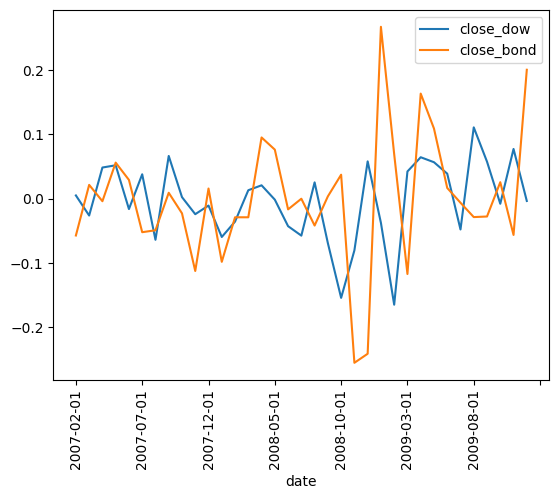

In [10]:
# unpivot everything except `year`
ur_tall = ur_wide.melt(
    id_vars=["year"],
    var_name="month",
    value_name="unempl_rate",
)

# create a `date` column using the `month` and `year` columns of ur_tall
ur_tall["date"] = pd.to_datetime(ur_tall["year"] + "-" + ur_tall["month"], format="%Y-%b")

# sort by `date` ascending
ur_sorted = ur_tall.sort_values("date")

# unpivot everything besides `metric`
bond_perc = ten_yr.melt(id_vars=["metric"], var_name="date", value_name="close")

# query for only rows where metric == close
bond_perc_close = bond_perc.query("metric == 'close'")

# merge_ordered on date using inner (default is outer for merge_ordered)
dow_bond = pd.merge_ordered(
    dji,
    bond_perc_close,
    on="date",
    how="inner",
    suffixes=("_dow", "_bond"),
)

# plot only `close_dow` and `close_bond`
dow_bond.plot(y=["close_dow", "close_bond"], x="date", rot=90)
plt.show()
